# OpenSubtitle DataSet with Plot

In [2]:
#read full dataset
with open("../data/OpenSubtitles/OpenSubtitles.th-zh_cn.th","r",encoding='utf-8') as f:
    th_lines = f.readlines()
    th_lines = [i[:-1] for i in th_lines]
with open("../data/OpenSubtitles/OpenSubtitles.th-zh_cn.zh_cn","r",encoding='utf-8') as f:
    zh_lines = f.readlines()
    zh_lines = [i[:-1] for i in zh_lines]

In [3]:
len(th_lines)

1227589

In [4]:
th_lines[:10]

['คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?',
 'เป็นไปไม่ได้รึไง? แต่มันจริงนะ',
 'คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?',
 'ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา',
 'ฉันยังจำเสียงหัวใจเต้นของพ่อได้',
 'ไม่ใช่ฉันที่จำได้ แต่เป็นความทรงจำของฉันต่างหาก',
 'แต่คุณไม่ใช่ คาธอลิกแล้วนี่?',
 'เขาปล่อยให้คนอื่นผ่านไป',
 'ทำไมอยู่ดีๆถึงพูดเรื่องพิธีล้างบาปขึ้นมาล่ะ?',
 'ฉันนึกถึงมันบ่อยๆ บางทีฉันก็จำได้']

In [5]:
len(zh_lines)

1227589

In [6]:
zh_lines[:10]

['记得自己的洗礼仪式 这可能吗?',
 '不可能?',
 '可那是事实啊 是听大人们说的吧?',
 '我能感受到透过玻璃的阳光',
 '我还记得爸爸的心跳声呢',
 '真的不是听来的 是记忆里的',
 '你也不是信天主教的吧',
 '改新教也有洗礼这种仪式',
 '为什么忽然提起洗礼仪式?',
 '最近想起来的 偶尔会想起']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({'th':th_lines,'zh':zh_lines}) 

In [9]:
df

,th,zh
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢
...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）
1227587,คำบรรยายโดย:,字幕翻译：


In [9]:
df.shape

(1227589, 2)

In [10]:
df.drop_duplicates().shape

(1188987, 2)

In [11]:
df.th.nunique(),df.zh.nunique()

(1090783, 1079254)

In [12]:
#save deduped
df.to_csv('../data/OpenSubtitles/OpenSubtitles_zhth_dedup.txt',header=None, index=None, sep='\n')

In [10]:
from pythainlp import word_tokenize

In [11]:
df['th_str'] = df.th.map(lambda x: len(x))

In [12]:
df['zh_str'] = df.zh.map(lambda x: len(x))

In [13]:
df['th_word'] = df.th.map(lambda x: len(word_tokenize(x)))

In [14]:
df

,th,zh,th_str,zh_str,th_word
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9
...,...,...,...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则,43,8,9
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）,36,7,14
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）,76,22,19
1227587,คำบรรยายโดย:,字幕翻译：,12,5,3


array([[<AxesSubplot:title={'center':'th_str'}>,
        <AxesSubplot:title={'center':'zh_str'}>],
       [<AxesSubplot:title={'center':'th_word'}>, <AxesSubplot:>]],
      dtype=object)

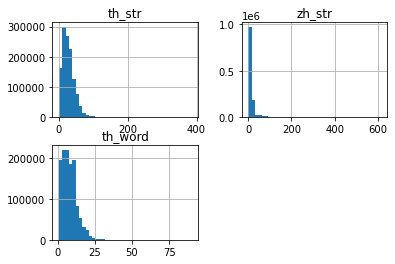

In [28]:
df.hist(bins = 40)

In [29]:
df.th_str.sum()

34705871

In [30]:
df.th_str.mean()

28.27157216299592

In [31]:
df.zh_str.sum()

16411969

In [32]:
df.zh_str.mean()

13.369270171042588

In [33]:
df.th_word.sum()

10079120

In [34]:
df.th_word.mean()

8.21050041992882

## spacy-pkuseg

In [15]:
import pkuseg

In [16]:
seg = pkuseg.pkuseg()           # 以默认配置加载模型
# text = seg.cut('我爱北京天安门')  # 进行分词
# print(len(text))

In [17]:
df['zh_word'] = df.zh.map(lambda x: len(seg.cut(x)))
df

,th,zh,th_str,zh_str,th_word,zh_word
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,9
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,12
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,8
...,...,...,...,...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则,43,8,9,5
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）,36,7,14,5
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）,76,22,19,14
1227587,คำบรรยายโดย:,字幕翻译：,12,5,3,3


In [65]:
# df.to_csv('../data/OpenSubtitles/OpenSubtitles_sample_str_word.csv',header=None, index=None, sep='\n')

In [18]:
df

,th,zh,th_str,zh_str,th_word,zh_word
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,9
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,12
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,8
...,...,...,...,...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则,43,8,9,5
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）,36,7,14,5
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）,76,22,19,14
1227587,คำบรรยายโดย:,字幕翻译：,12,5,3,3


## Ratio

In [19]:
ratio = df['th_word'] / df['zh_word']

In [20]:
ratio

0          1.333333
1          3.000000
2          0.666667
3          1.000000
4          1.125000
             ...   
1227584    1.800000
1227585    2.800000
1227586    1.357143
1227587    1.000000
1227588    2.500000
Length: 1227589, dtype: float64

In [21]:
df['Ratio'] = ratio

In [22]:
df

,th,zh,th_str,zh_str,th_word,zh_word,Ratio
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,9,1.333333
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3,3.000000
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,12,0.666667
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,8,1.000000
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,8,1.125000
...,...,...,...,...,...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则,43,8,9,5,1.800000
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）,36,7,14,5,2.800000
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）,76,22,19,14,1.357143
1227587,คำบรรยายโดย:,字幕翻译：,12,5,3,3,1.000000


## Similarity Score

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [24]:
def get_similar_score(lang1: str, lang2: str, batch_size: int, embed):

    scores = []

    if len(lang1) % batch_size != 0:
        num_of_batch = int(len(lang1)/batch_size)+1
    else:
        num_of_batch = int(len(lang1)/batch_size)

    for i in range(num_of_batch):
        start = i*batch_size
        end = start+batch_size
        if i <= num_of_batch:

            lang1_temp = lang1[start:end]
            lang2_temp = lang2[start:end]

            lang1_embedding = embed(lang1_temp)
            lang2_embedding = embed(lang2_temp)
            distance_matrix = tf.matmul(
                lang1_embedding, lang2_embedding, transpose_b=True).numpy()

            for j in range(len(distance_matrix)):
                scores.append(distance_matrix[j][j])

    return scores

In [25]:
emb = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3', tags=None, options=None)

In [27]:
sims = get_similar_score(zh_lines, th_lines, 16, emb)

In [28]:
df['Similarity_score'] = sims

In [87]:
df

,th,zh,th_str,zh_str,th_word,zh_word,Ratio,Similarity_score
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,9,1.333333,0.594708
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3,3.000000,0.626082
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,12,0.666667,0.380066
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,8,1.000000,0.788977
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,8,1.125000,0.831345
...,...,...,...,...,...,...,...,...
1227584,นั่นก็เพราะว่า ผมต้องการให้มันเป็นอย่างนั้น,这是我自己的原则,43,8,9,5,1.800000,0.299133
1227585,(เหล่าสุภาพสตรีของผม โดย มิชิมะ ชิน),（我的女人们）,36,7,14,5,2.800000,0.548381
1227586,(ภาพยนตร์ชุดนี้เป็นเรื่องแต่ง) (ตัวละครและองค์...,（本剧纯属虚构 剧中人物、团体名称皆为架空）,76,22,19,14,1.357143,0.486174
1227587,คำบรรยายโดย:,字幕翻译：,12,5,3,3,1.000000,0.408680


In [88]:
df.to_csv('../data/OpenSubtitles/OpenSubtitles_ALL.csv',header=None, index=None, sep='\n')

In [91]:
df2 = df.sort_values('Similarity_score')

In [92]:
df2.to_csv('../data/OpenSubtitles/OpenSubtitles_ALL_SortbySims.csv',header=None, index=None, sep='\n')

<AxesSubplot:ylabel='Frequency'>

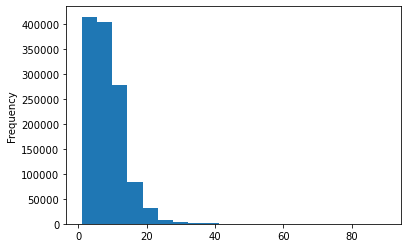

In [66]:
df['th_word'].plot(kind='hist', bins=20)

In [94]:
df['th_word'].max()

90

In [95]:
df['th_word'].mean()

8.21050041992882

In [96]:
df['th_word'].value_counts()

5     114872
6     112052
7     107687
4     104370
8      97866
       ...  
67         3
73         2
64         2
63         2
90         1
Name: th_word, Length: 68, dtype: int64

<AxesSubplot:ylabel='Frequency'>

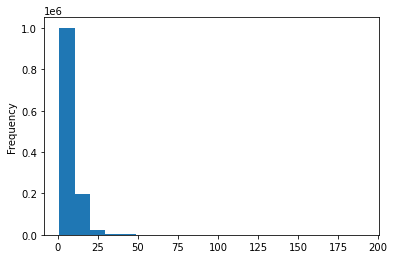

In [78]:
df['zh_word'].plot(kind='hist', bins=20)

In [97]:
df['zh_word'].max()

191

In [98]:
df['zh_word'].mean()

7.323725611747906

In [110]:
df['zh_word'].value_counts()

5      135027
6      132358
4      125836
7      119072
3      105469
        ...  
112         1
111         1
100         1
95          1
191         1
Name: zh_word, Length: 123, dtype: int64

<AxesSubplot:ylabel='Frequency'>

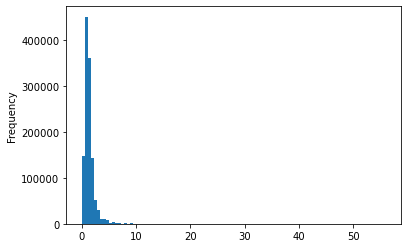

In [83]:
df['Ratio'].plot(kind='hist', bins=100)

In [77]:
df['Ratio'].max()

56.0

In [84]:
df['Ratio'].mean()

1.3694959875491268

In [112]:
df['Ratio'].value_counts()

1.000000    167515
2.000000     62184
1.500000     58043
1.333333     43179
0.500000     36797
             ...  
9.600000         1
9.285714         1
3.928571         1
2.150000         1
0.177419         1
Name: Ratio, Length: 1602, dtype: int64

In [117]:
df2 = df['Ratio'] != 1

In [118]:
df2.value_counts()

True     1060074
False     167515
Name: Ratio, dtype: int64

<AxesSubplot:ylabel='Frequency'>

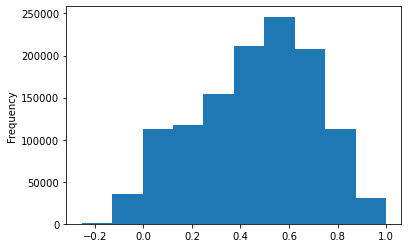

In [34]:
df['Similarity_score'].plot(kind='hist', bins=10)

In [85]:
df['Similarity_score'].max()

1.0000009536743164

In [86]:
df['Similarity_score'].mean()

0.461020182776236